<a href="https://colab.research.google.com/github/brianr-v/Simulacion2/blob/main/N%C3%BAmero_Pi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Aproximación del número pi**

**PASO 1**. Defina las variables que intervienen en el modelo.

Hay tres variables importantes en este método:
 * x_valores : se utiliza para guardar el valor de la transformada inversa.
 * g_valores: se utilaza para evaluar el "x_valor" en la función $f(x)=\sqrt(1-x²)$.
 * area : guarda los valores aproximados del area de pi, tambien puede ser llamado número de aciertos $N_H$.

**PASO 2**. Formule la distribución de probabilidad de cada variable.

Utilizaremos una distribución uniforme en el intervalo (0,1),es decir $u\sim(0,1)$, nos servira para generar números aleatorios.

|      |**Acierto**|**Error**|
|------|-----------|----------|
|f(x)  |$\frac{I}{c(b-a)}$ ó $\frac{N_H}{N}$|1-$\frac{N_H}{N}$|
|F(x)  |$\frac{N_H}{N}$|1     |

Importamos las bibliotecas numpy y matplotlib.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats


Genero una función en donde grafico 1000 puntos de la funcion $f(x)=\sqrt(1-x²)$.

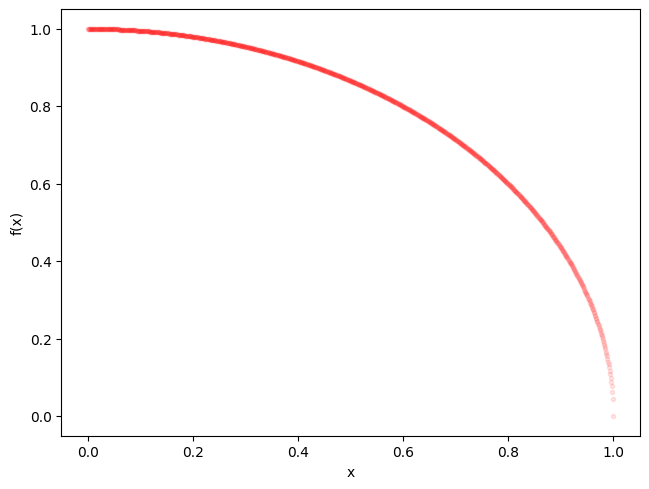

In [2]:
def funcion_g(x):
    # Define aquí la función g(X) que deseas evaluar
    return np.sqrt(1 - x**2)

def grafica_funcion(x_valores,g_valores):
    plt.scatter(x_valores, g_valores, marker='.', alpha=0.1, color ='red')
    plt.tight_layout()
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.show()

# Grafiaca de la funcion a integrar
x = np.linspace(0, 1, 1000)   # Genera 1000 puntos entre el 0 y el 1
funcion = funcion_g(x)        # Llama a la función que evaluara los puntos "x"
grafica_funcion(x,funcion)

**PASO 3**. Creación del método

Genero una funcion que se llama acierto_Rechazo que pide como valores, a: limite inferior de la funcion; b:limite superior de la función; c: constante que acota a la función; por último n: núero de iteraciones del método.
Lo que hace el método es lo siguiente:
* Genero un contador "aciertos" donde acumulo si el punto cayo dentro de la función.  
* Creo una lista vacia "area" donde sumo el valor aproximado del area.
* Creo un ciclo for que va de 1 al 1,001
  * Creo una lista "u" que contenga 2 números aleatorios.
  * Aplico la trasformada inversa que guardo en "x_valores".
  * Cuento los aciertos tales que $g(Xi) > c * U$ .
  * Estimo I calculando la media muestral θ2.
  * Por último regreso la lista "area".


In [3]:
def acierto_Rechazo(a, b, c, n):
    aciertos = 0
    area = []
    for i in range(1,n+1):
        # Generar dos númeos aleatorios independientes
        u = np.random.uniform(0,1,2)

        # Aplicar la transformada inversa
        x_valores = a + u[0] * (b - a)      #Utilizar la tranformada inversa

        # Calcular g(Xi)
        g_valores = funcion_g(x_valores)

        # Paso 5: Contar los aciertos tales que g(Xi) > c * Un+i
        if g_valores > c * u[1]:
            aciertos += 1

        # Paso 6: Estimar I calculando la media muestral θ2
        theta_2 = c * (b - a) * (aciertos * 4 / i)
        area.append(theta_2)

    return area

# Parámetros del intervalo [a, b]
a = 0
b = 1

# Parámetro de umbral c
c = 1

# Número de puntos a generar
n = 1000

# Manda allamar a las funciones que genran la simulacion del valor aproximado de pi
simulacion = acierto_Rechazo(a, b , c, n)
print("\nResultado de aproximacion de pi: ",simulacion[-1]," con ",n," repeticiones del ciclo")


Resultado de aproximacion de pi:  3.136  con  1000  repeticiones del ciclo


**Estabilidad del método**

Creo una funcion donde grafico el número de ensayos contra el area que obtuvimos atras.


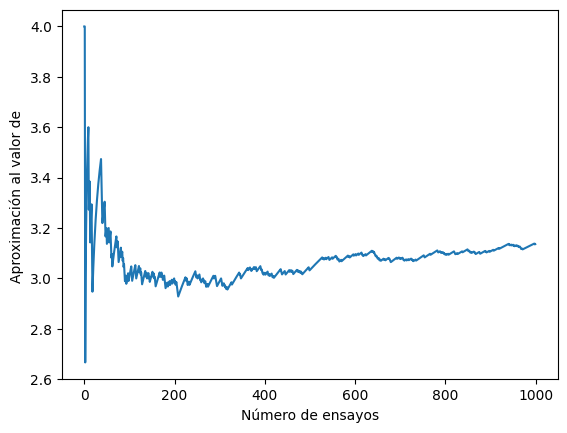

In [4]:
def estabilidad_simulacion(ensayos, area):
    # Valores para la grafica
    #plt.figure(num=None, figsize=(10, 12), dpi=80, facecolor='w', edgecolor='k')
    plt.plot(ensayos,area)
    plt.xlabel('Número de ensayos')
    plt.ylabel('Aproximación al valor de ')
    plt.show()

# Llamamos a la funcion que grafica de la estabilidad
ensayos = range(0,n)
estabilidad_simulacion(ensayos, simulacion)

**Repetición del método**

Ahora necesitamos crear una función que repetira el método "aceptacion_Rechazo" N veces.La función regresa una lista con N simulaciones, que despues utilizaremos para generar un histograma.

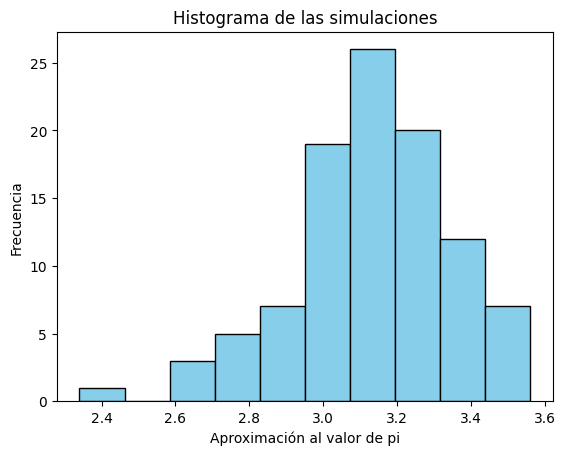

In [5]:
def simulaciones(n):
    resultado_simulaciones = []
    for i in  range(n):
        resultado_simulaciones.append(np.mean(acierto_Rechazo(a, b, c, n)))
    return resultado_simulaciones

# Hace histograma de las simulaciones
def histograma(simulaciones_Totales):
    # Crear histograma de las simulaciones
    plt.hist(simulaciones_Totales, bins=10, color='skyblue', edgecolor='black')

    # Agregar etiquetas y título
    plt.xlabel('Aproximación al valor de pi')
    plt.ylabel('Frecuencia')
    plt.title('Histograma de las simulaciones')

    # Mostrar el histograma
    plt.show()

# Hacer 100 simulaciones
N = 100
simulaciones_Totales = simulaciones(N)

# Hacer histograma
histograma(simulaciones_Totales)

**Nivel de confianza**

In [6]:
# Definir nivel de convianza del experimento
nivel_confianza = 0.95

datos = np.array(simulaciones_Totales)
media_muestral = np.mean(simulaciones_Totales)
desviacion = np.std(simulaciones_Totales)
tamaño_muestra = len(datos)

# Codigo con valor critico

valor_critico = stats.norm.ppf((1 + nivel_confianza)/2)
intervalo_inf = media_muestral - (valor_critico)*(desviacion/np.sqrt(tamaño_muestra))
intervalo_sup = media_muestral + (valor_critico)*(desviacion/np.sqrt(tamaño_muestra))
print("\nIntervalo inferior : ",intervalo_inf)
print("\nIntervalo superior : ",intervalo_sup)


Intervalo inferior :  3.0936259875434855

Intervalo superior :  3.176642274675813
